# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [153]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)


Number of cities in the list: 588
['thompson', 'bethel', 'guerrero negro', 'kyzyl-burun', 'margaret river', 'corowa', 'adamstown', 'bredasdorp', 'minot', 'avarua', 'blackmans bay', 'izberbash', 'vung tau', 'fortaleza', 'nizhnesortymskiy', 'paracuru', 'kavieng', 'portland', 'tralee', 'hermanus', 'vorgashor', 'ushtobe', 'yellowknife', 'laguna', 'isle of lewis', 'kuraymah', 'suva', 'kailua-kona', 'ancud', 'port-aux-francais', 'port mathurin', 'sola', 'kristiansund', 'lashio', 'krasnogvardeyskoye', 'pante makasar', 'osvaldo cruz', 'badger', 'san antonio de pale', 'puerto natales', 'lerwick', 'pelabuhanratu', 'dame-marie', 'kijang', 'jamestown', 'shingu', 'kalmunai', 'hithadhoo', 'tofol', 'kurchatov', 'klyuchi', 'hamilton', 'bodo', 'bilibino', 'waitangi', 'al kharijah', 'grytviken', 'necochea', 'longyearbyen', 'ilulissat', 'valparaiso', 'egilsstadir', 'paramonga', 'san antonio del estrecho', 'olonkinbyen', 'codrington', "kapa'a", 'troyitske', 'lata', 'cave creek', 'chibougamau', 'anadyr', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [154]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    #print(city_url)

    # Get city weather response
    city_response = requests.get(city_url)
    #print(city_response)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['weather'][0]['description']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # 
        city_date = time.strftime('%Y-%m-%d', city_date_struct)
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | kyzyl-burun
City not found. Skipping...
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | corowa
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | minot
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | izberbash
Processing Record 13 of Set 1 | vung tau
Processing Record 14 of Set 1 | fortaleza
Processing Record 15 of Set 1 | nizhnesortymskiy
Processing Record 16 of Set 1 | paracuru
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | ushtob

In [155]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

               City      Lat       Lng  Max Temp  Humidity  \
0          thompson  55.7435  -97.8558      8.09        87   
1            bethel  41.3712  -73.4140     25.20        65   
2    guerrero negro  27.9769 -114.0611     20.84        64   
3    margaret river -33.9500  115.0667     12.41        89   
4            corowa -36.0333  146.3833      8.65        74   
..              ...      ...       ...       ...       ...   
553         colares  38.7992   -9.4469     18.75        94   
554    myers corner  41.6062  -73.8729     20.67        79   
555        asadabad  34.7824   48.1185     17.97        52   
556        kerikeri -35.2268  173.9474     18.28        95   
557       kemijarvi  66.7131   27.4306      8.10        81   

                  Cloudiness  Wind Speed Country        Date  
0    light intensity drizzle        3.60      CA  2024-06-07  
1                  clear sky        2.06      US  2024-06-07  
2                 few clouds        8.47      MX  2024-06-07  
3  

In [156]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,8.09,87,light intensity drizzle,3.60,CA,2024-06-07
1,bethel,41.3712,-73.4140,25.20,65,clear sky,2.06,US,2024-06-07
2,guerrero negro,27.9769,-114.0611,20.84,64,few clouds,8.47,MX,2024-06-07
3,margaret river,-33.9500,115.0667,12.41,89,broken clouds,3.66,AU,2024-06-07
4,corowa,-36.0333,146.3833,8.65,74,clear sky,2.62,AU,2024-06-07


In [157]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [158]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,8.09,87,light intensity drizzle,3.60,CA,2024-06-07
1,bethel,41.3712,-73.4140,25.20,65,clear sky,2.06,US,2024-06-07
2,guerrero negro,27.9769,-114.0611,20.84,64,few clouds,8.47,MX,2024-06-07
3,margaret river,-33.9500,115.0667,12.41,89,broken clouds,3.66,AU,2024-06-07
4,corowa,-36.0333,146.3833,8.65,74,clear sky,2.62,AU,2024-06-07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

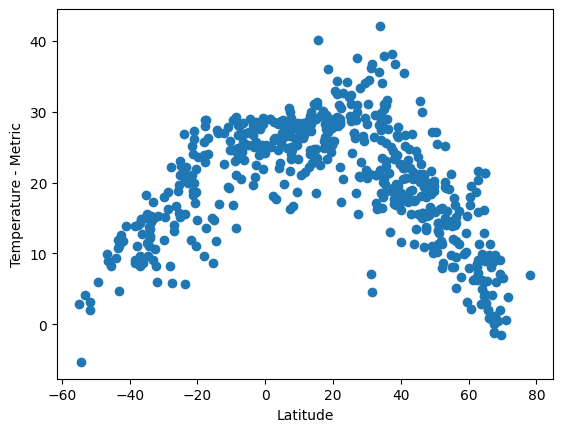

In [161]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature - Metric')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [162]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

NameError: name 'stats' is not defined

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE